# Understand sampling, clipping and aliasing problems

In [112]:
import io
from IPython.nbformat import read

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = read(f,3)
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
        
execute_notebook("create_plot_signal.ipynb") # also imports numpy as np and matplotlib.pyplot as plt

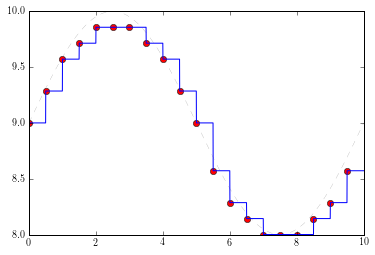

In [115]:
# example
t = np.linspace(0,10,10000) # almost continuous
y = 9+np.sin(2*np.pi*0.1*t)

ts,yq,tr,yr = adc(t,y,fs=2,N=4,miny=0,maxy=10,method='soh') # monopolar
plt.figure()
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')

In [119]:
# an example from the A/D lecture
t = np.linspace(0,1,1000) # almost continuous
y = 3 + 3*np.sin(2*np.pi*10*t - np.pi/2.)

### sample at 15 Hz

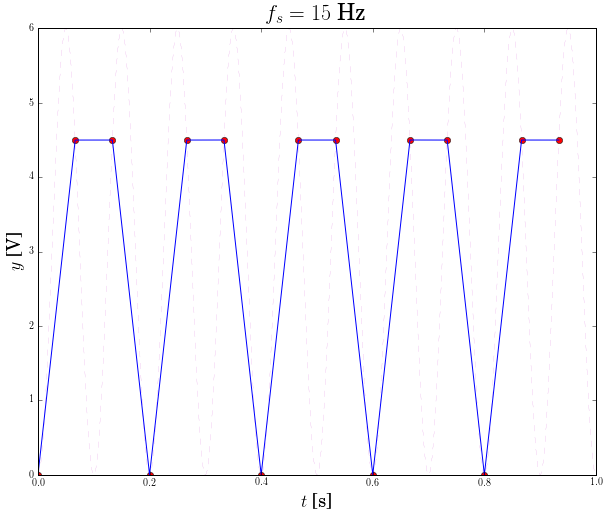

In [136]:
ts,yq,tr,yr = adc(t,y,fs=15.,N=24,miny=0,maxy=10,method=None) # monopolar
plt.figure(figsize=(10,8))
plt.plot(t,y,'m--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-')
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$y$ [V]',fontsize=18)
plt.xlim([0,1.0])
plt.title('$f_s = 15 $ Hz ',fontsize=22)

### sample at 11 Hz

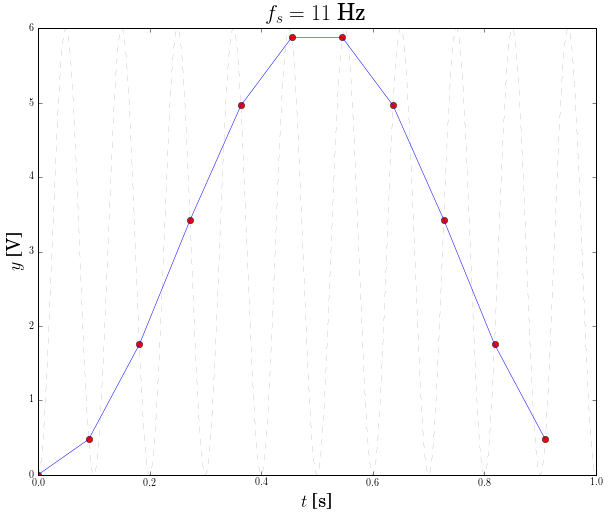

In [132]:
ts,yq,tr,yr = adc(t,y,fs=11.,N=24,miny=0,maxy=10) # monopolar
plt.figure(figsize=(10,8))
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-',lw=.5)
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$y$ [V]',fontsize=18)
plt.xlim([0,1.0])
plt.title('$f_s = 11$ Hz',fontsize=22)

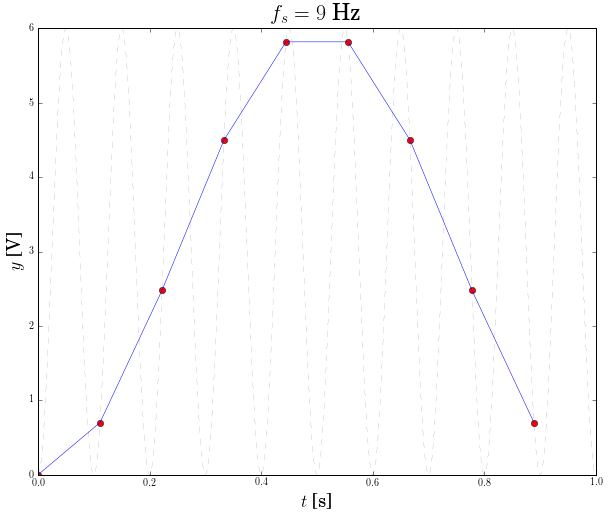

In [133]:
ts,yq,tr,yr = adc(t,y,fs=9.,N=24,miny=0,maxy=10) # monopolar
plt.figure(figsize=(10,8))
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-',lw=.5)
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$y$ [V]',fontsize=18)
plt.xlim([0,1.0])
plt.title('$f_s = 9$ Hz',fontsize=22)

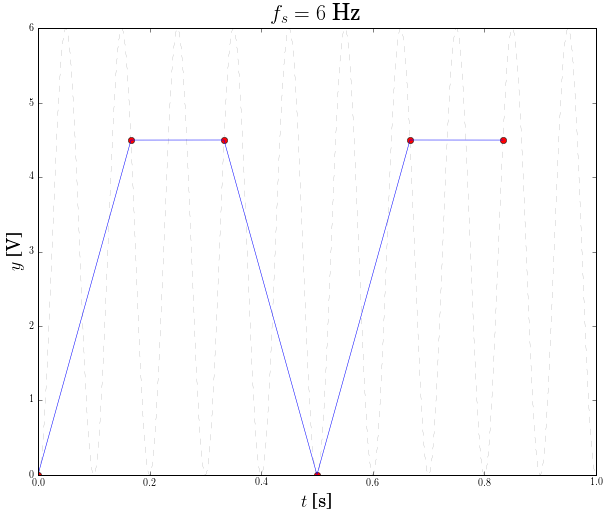

In [139]:
ts,yq,tr,yr = adc(t,y,fs=6.,N=24,miny=0,maxy=10) # monopolar
plt.figure(figsize=(10,8))
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-',lw=.5)
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$y$ [V]',fontsize=18)
plt.xlim([0,1.0])
plt.title('$f_s = 6$ Hz',fontsize=22)

### Estimate the aliasing using the folding diagram or the formula:
if $f_s > 2 f$ , no aliasing

if $2/3 f < f_s < 2 f$, $f_a = |f_s - f|$

if $f_s < 2/3 f$, $f_a = (f/f_f)f_f$, where $f_f = f_s/2$ 

in most cases: 
    $$f_a = \left|f- f_s \cdot NINT (f/f_s) \right|$$

### How do we use it? we use trial/error and smart guesses:


let's check different options: 

if it's aliasing we could be in one of the two regions, either 6 Hz < 2/3 f, i.e. f > 1.5*6, f > 9 or 

it can be that 6Hz is above 2/3f and below 2f, i.e. f is between 3 and 9 Hz 

theoretically speaking if f is below 3Hz, then we're above the Nyquist frequency. 

So, we see 2 Hz (2 peaks in 1 second) so it can be that we sampled correctly using 6 Hz or incorrectly and got aliasing. 

Therefore we could test few things, but first let's prepare some options:

1. if we are fine and 2Hz is there, so we just see not a nice sine signal and we can increase the sampling frequency and get it nice

2. if we are aliasing, then it can be what? 2Hz = |f - 6Hz * NINT(f/6Hz)|, so f = 6Hz * NINT(f/6Hz) + 2Hz. Let's see if 10 Hz is reasonable: 10/6 = 1.6667 and the nearest integer is 2 and it means that 10 - 6*2 = 2 Hz.

3. it can be also lower than 6Hz and we got 2Hz for instance if we sampled f = 4Hz



In [143]:
np.abs(10 - 6 * np.round(10./6.))

2.0

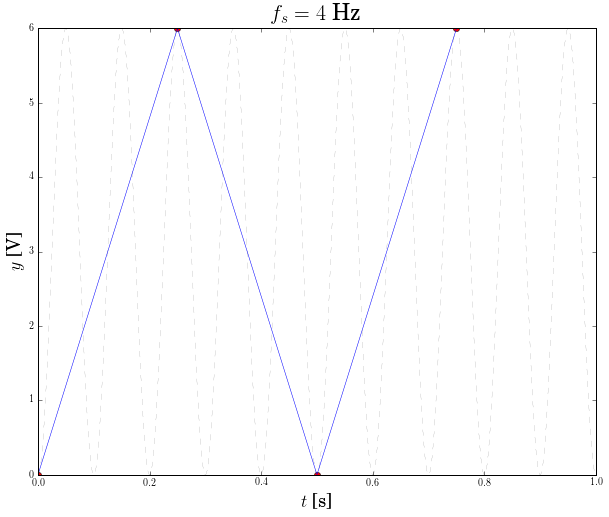

In [145]:
ts,yq,tr,yr = adc(t,y,fs=4.,N=24,miny=0,maxy=10) # monopolar
plt.figure(figsize=(10,8))
plt.plot(t,y,'k--',lw=0.1)
plt.plot(ts,yq,'ro')
plt.plot(tr, yr,'b-',lw=.5)
plt.xlabel('$t$ [s]',fontsize=18)
plt.ylabel('$y$ [V]',fontsize=18)
plt.xlim([0,1.0])
plt.title('$f_s = 4$ Hz',fontsize=22)